In [23]:
import numpy as np
import pandas as pd
import json

In [24]:
# data_path = "/home/petigep/college/orak/digikep2/GOLD_TEST/great_cnn_pixels_76_res.csv"
# data_path = "/home/petigep/college/orak/digikep2/logo/eval_dataset/great_cnn_pixels_76_res_real_life_images.csv"
data_path = "/home/petigep/college/orak/digikep2/logo/eval_dataset/great_cnn48x4_pixels_74_res_real_life_images.csv"

In [25]:
df = pd.read_csv(data_path)

In [26]:
prediction_label = list()

for item in df["PREDICTION"]:
    item = item[1:-1]
    float_list= [float(x) for x in item.split(", ")]
    prediction_label.append(np.argmax(float_list))

h = """{'0': 'adidas',
 '1': 'apple',
 '2': 'cocacola',
 '3': 'disney',
 '4': 'nike',
 '5': 'nologo',
 '6': 'puma'}"""

json_acceptable_string = h.replace("'", "\"")
id2label = json.loads(json_acceptable_string)
id2label = {int(k): v for k,v in id2label.items()}
prediction_label_text = [id2label[x] for x in prediction_label]

In [27]:
df["PREDICTION_LABEL_TEXT"] = prediction_label_text
df["PREDICTION_LABEL_ID"] = prediction_label
df.to_csv("/home/petigep/college/orak/digikep2/logo/eval_dataset/trash/great_cnn_pixels_76_res_real_life_images_extended.csv", index=False)

In [28]:
data_path2 = "/home/petigep/college/orak/digikep2/logo/eval_dataset/trash/great_cnn_pixels_76_res_real_life_images_extended.csv"
outfile = "/home/petigep/college/orak/digikep2/logo/eval_dataset/trash/great_cnn_pixels_76_res_real_life_images_by_class.csv"
df = pd.read_csv(data_path2)

In [29]:
def accuracy_by_class(y, pred):
    class_good = dict()
    class_bad = dict()
    
    for a, b in zip(y, pred):
#         print(a, b)
        if a not in class_good:
            class_good[a] = 0
            
        if a not in class_bad:
            class_bad[a] = 0
        if a == b:
            class_good[a] += 1
        else:
            class_bad[a] += 1
    
    return class_good, class_bad
    

In [30]:
differency = dict()
good, bad = accuracy_by_class(df["LABEL"], df["PREDICTION_LABEL_ID"])

for key, value in good.items():
    differency[key] = value / (value + bad[key])

with open (outfile, "w") as out_f:
    for key, value in differency.items():
        out_f.write("{}, {}\r\n".format(key, value))
    
# res = pd.DataFrame.from_dict(differency, orient='index')
# res.to_csv(outfile, index=False)



In [31]:
differency

{0: 0.4,
 1: 0.11428571428571428,
 2: 0.9142857142857143,
 3: 0.15,
 4: 0.02857142857142857,
 5: 0.0,
 6: 0.029411764705882353}

In [35]:
labels = list()
accuracy = list()

for key, value in differency.items():
    labels.append(id2label[key])
    accuracy.append(value)

plotting_df = pd.DataFrame({"LABELS": labels, "ACCURACY": accuracy})
plotting_df

,LABELS,ACCURACY
0,adidas,0.400000
1,apple,0.114286
2,cocacola,0.914286
3,disney,0.150000
4,nike,0.028571
5,nologo,0.000000
6,puma,0.029412


In [36]:
plotting_df.to_csv("/home/petigep/college/orak/digikep2/kotprog_prezentation/results/second_good_model.csv")

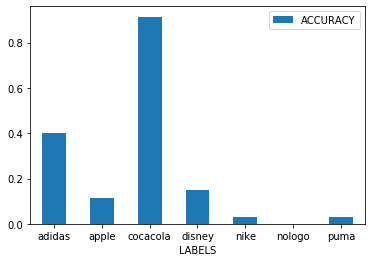

In [38]:
ax = plotting_df.plot.bar(x='LABELS', y='ACCURACY', rot=0)

In [39]:
fig = ax.get_figure()
fig.savefig("/home/petigep/college/orak/digikep2/kotprog_prezentation/results/second_good_model.png")